# Importing the libraries

In [1]:
# Importing the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [3]:
# loading the csv file
leeds=pd.read_csv('leads.csv')
leeds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [780]:
#checking the info of all the columns
leeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [781]:
# checking the shape of data set
leeds.shape

(9240, 37)

In [782]:
# checking for errors in data type
leeds['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [783]:
# Converting all the values to lower case
leeds= leeds.applymap(lambda s:s.lower() if type(s) == str else s)

In [784]:
# Replacing 'Select' with NaN (Since it means no option is selected)
leeds = leeds.replace('select',np.nan)

In [785]:
#checking the null values
leeds.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [786]:
# checking the percentage of null values in each column.
round(leeds.isnull().sum()/len(leeds)*100,1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

# Data Cleaning

**First of all lets remove the columns with more than 30 percent of null values**

In [787]:
# Seperating the columns with more than 30 % null values
empty=leeds.isnull().sum()/len(leeds)*100
empty=empty[empty>=30]
empty

Specialization                        36.580087
How did you hear about X Education    78.463203
Tags                                  36.287879
Lead Quality                          51.590909
Lead Profile                          74.188312
City                                  39.707792
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [788]:
# drop the columns
empty = list(empty[empty.values>=30].index)
leeds.drop(labels=empty,axis=1,inplace=True)

In [789]:
leeds.shape

(9240, 27)

In [790]:
round(leeds.isnull().sum()/len(leeds)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [791]:
# checking the unique values in each column
leeds.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [792]:
# checking the columns for only single value
single=leeds.nunique()
single=single[single==1]
single

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64

In [793]:
# removing the columns
single = list(single[single.values==1].index)
leeds.drop(labels=single,axis=1,inplace=True)

In [794]:
leeds.shape

(9240, 22)

In [795]:
round(leeds.isnull().sum()/len(leeds)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [796]:
# Imputation for coulmns.
leeds['What matters most to you in choosing a course'] = leeds['What matters most to you in choosing a course'].fillna('not provided')
leeds['Country'] = leeds['Country'].fillna('not provided')
leeds['What is your current occupation'] = leeds['What is your current occupation'].fillna('not provided')

In [797]:
round(leeds.isnull().sum()/len(leeds)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [798]:
# Treating the missing values in these columns
leeds['Lead Source'] = leeds['Lead Source'].fillna(leeds['Lead Source'].mode()[0])
leeds['TotalVisits'] = leeds['TotalVisits'].fillna(leeds['TotalVisits'].median())
leeds['Page Views Per Visit'] = leeds['Page Views Per Visit'].fillna(leeds['Page Views Per Visit'].median())
leeds['Last Activity'] = leeds['Last Activity'].fillna(leeds['Last Activity'].mode()[0])

In [799]:
round(leeds.isnull().sum()/len(leeds)*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [800]:
# Getting the stastical summary for the given data
leeds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


<AxesSubplot:>

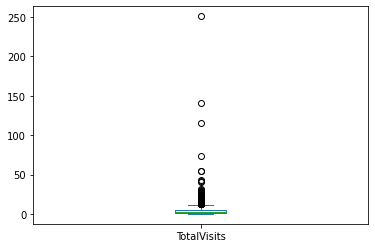

In [801]:
# checking for outliers
leeds['TotalVisits'].plot.box()

In [802]:
# Treating the outlier
leeds=leeds[leeds.TotalVisits<100]

<AxesSubplot:>

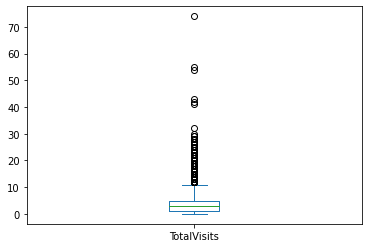

In [803]:
leeds['TotalVisits'].plot.box()

<AxesSubplot:>

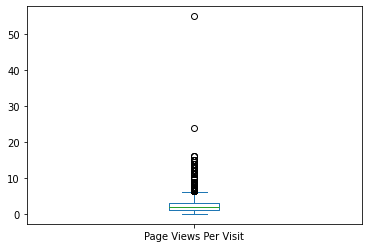

In [804]:
# checking for outliers
leeds['Page Views Per Visit'].plot.box()

In [805]:
# Treating the outlier
leeds=leeds[leeds['Page Views Per Visit']<30]

<AxesSubplot:>

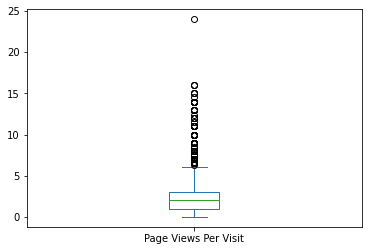

In [806]:
leeds['Page Views Per Visit'].plot.box()

<AxesSubplot:>

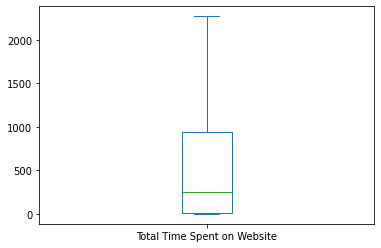

In [807]:
# checking for outliers
leeds['Total Time Spent on Website'].plot.box()

In [808]:
leeds.nunique()

Prospect ID                                      9236
Lead Number                                      9236
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        37
Total Time Spent on Website                      1731
Page Views Per Visit                              110
Last Activity                                      17
Country                                            39
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [809]:
# converting the counties into buckets for eaiser analysis
def tiers(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leeds['Country'] = leeds.apply(lambda x:tiers(x['Country']), axis = 1)
leeds['Country'].value_counts()

india            6488
not provided     2461
outside india     287
Name: Country, dtype: int64

In [810]:
leeds=leeds.drop('Prospect ID',axis=1)

# EDA

In [811]:
leeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9236 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9236 non-null   int64  
 1   Lead Origin                                    9236 non-null   object 
 2   Lead Source                                    9236 non-null   object 
 3   Do Not Email                                   9236 non-null   object 
 4   Do Not Call                                    9236 non-null   object 
 5   Converted                                      9236 non-null   int64  
 6   TotalVisits                                    9236 non-null   float64
 7   Total Time Spent on Website                    9236 non-null   int64  
 8   Page Views Per Visit                           9236 non-null   float64
 9   Last Activity                                  9236 

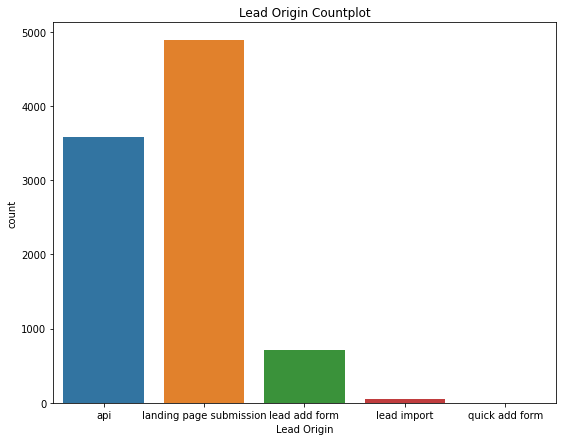

In [812]:
plt.figure(figsize = (9,7))
# plot the countplot
sns.countplot(x='Lead Origin', data=leeds)

# add a title to the plot
plt.title("Lead Origin Countplot")

# show the plot
plt.show()

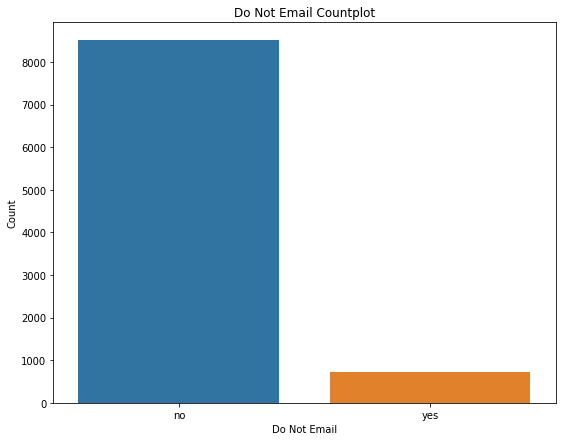

In [813]:
plt.figure(figsize = (9,7))
# plot the countplot
sns.countplot(x='Do Not Email', data=leeds)

# add a title to the plot
plt.title('Do Not Email Countplot')
plt.xlabel('Do Not Email')
plt.ylabel('Count')

# show the plot
plt.show()

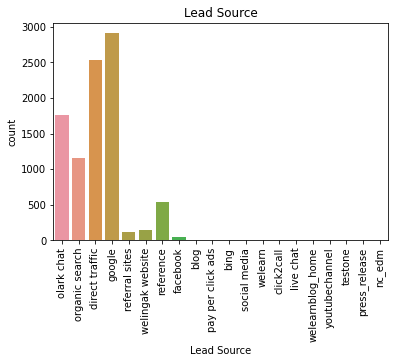

In [814]:
sns.countplot(leeds['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

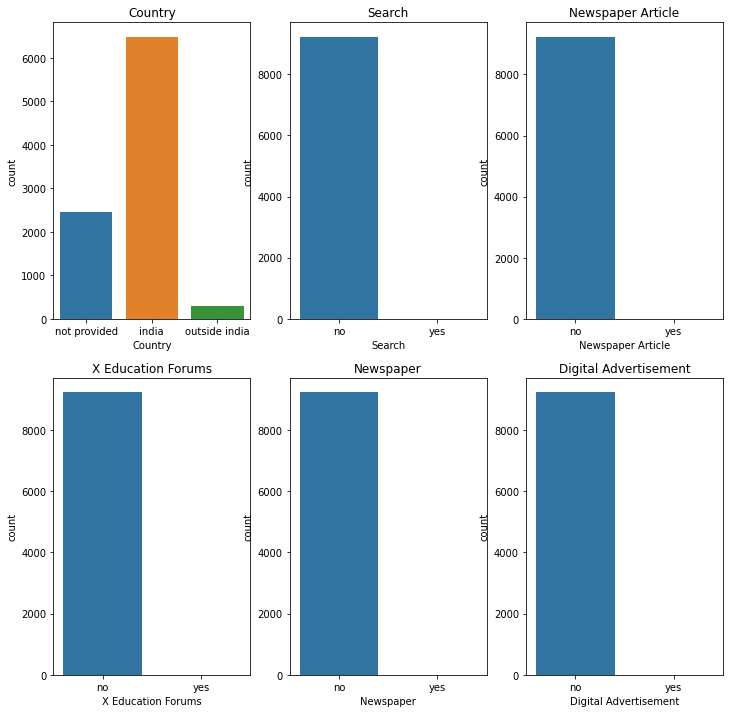

In [815]:
plt.figure(figsize = (12,12))
plt.subplot(2,3,1)
sns.countplot(leeds['Country'])
plt.title('Country')

plt.subplot(2,3,2)
sns.countplot(leeds['Search'])
plt.title('Search')

plt.subplot(2,3,3)
sns.countplot(leeds['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(2,3,4)
sns.countplot(leeds['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(2,3,5)
sns.countplot(leeds['Newspaper'])
plt.title('Newspaper')

plt.subplot(2,3,6)
sns.countplot(leeds['Digital Advertisement'])
plt.title('Digital Advertisement')
plt.show()

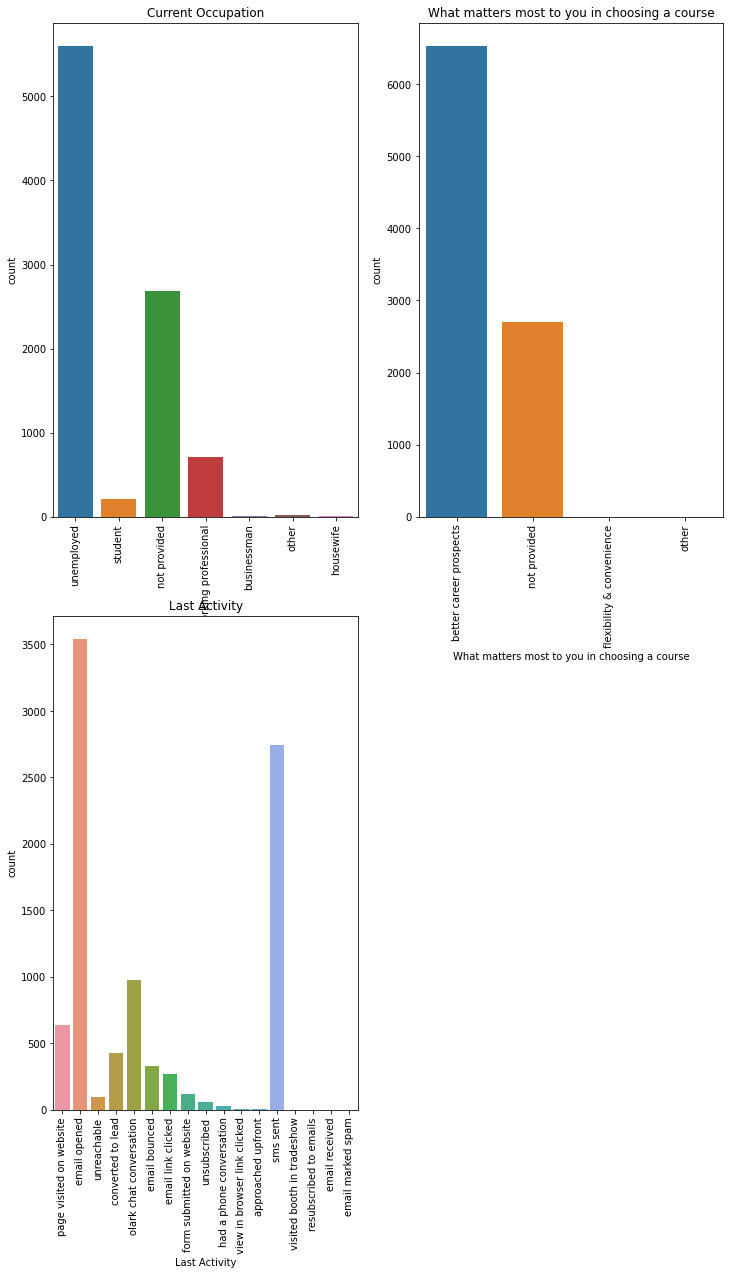

In [816]:
plt.figure(figsize = (12,20))

plt.subplot(2,2,1)
sns.countplot(leeds['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(leeds['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(leeds['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [817]:
leeds.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025362,0.029691,0.020244,0.056432
Converted,0.025362,1.000000,0.036829,0.362651,-0.002590
TotalVisits,0.029691,0.036829,1.000000,0.297937,0.656662
Total Time Spent on Website,0.020244,0.362651,0.297937,1.000000,0.326254
Page Views Per Visit,0.056432,-0.002590,0.656662,0.326254,1.000000


<AxesSubplot:>

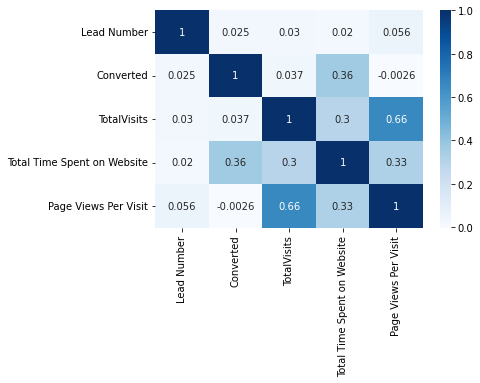

In [818]:
# Creating a heatmap to understand the corr betwwen features and lable
sns.heatmap(leeds.corr(), annot=True,cmap='Blues')

In [819]:
leeds.loc[:, leeds.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [820]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leeds[['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leeds = pd.concat([leeds, dummy], axis=1)
leeds

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.50,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,...,0,0,0,0,0,0,0,0,0,0
9236,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9237,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9238,579538,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,...,0,0,0,0,0,0,1,0,0,0


In [821]:
leeds = leeds.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leeds

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [822]:
leeds.shape

(9236, 66)

In [823]:
leeds.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
Lead Number,1.000000,0.025362,0.029691,0.020244,0.056432,-0.075110,0.029185,0.104744,0.007749,0.014805,...,0.000620,0.000095,0.080470,-0.031614,0.002003,0.005942,-0.169974,0.007644,-0.002990,0.001501
Converted,0.025362,1.000000,0.036829,0.362651,-0.002590,-0.051142,0.321733,-0.023709,0.013139,-0.008241,...,-0.008241,0.043480,-0.244300,-0.072691,-0.036055,0.013139,0.351868,0.036594,-0.012869,-0.008241
TotalVisits,0.029691,0.036829,1.000000,0.297937,0.656662,0.374696,-0.216136,-0.041466,-0.001099,0.001798,...,-0.003995,0.030746,-0.134036,-0.047880,0.227734,-0.009788,0.004918,0.008649,0.002615,0.013384
Total Time Spent on Website,0.020244,0.362651,0.297937,1.000000,0.326254,0.276205,-0.139731,-0.034939,0.032832,0.003593,...,-0.003812,0.022258,-0.106906,-0.051425,0.027257,-0.009261,0.125021,0.008934,0.000494,-0.007571
Page Views Per Visit,0.056432,-0.002590,0.656662,0.326254,1.000000,0.498361,-0.268928,-0.049738,-0.001760,0.008276,...,-0.001760,0.014750,-0.103047,-0.090154,0.026161,-0.011797,0.060637,0.020604,0.019091,0.001602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_resubscribed to emails,0.005942,0.013139,-0.009788,-0.009261,-0.011797,-0.011019,-0.003021,-0.000805,-0.000108,-0.000108,...,-0.000108,-0.000405,-0.007954,-0.001479,-0.001955,1.000000,-0.005770,-0.000614,-0.000744,-0.000108
Last Notable Activity_sms sent,-0.169974,0.351868,0.004918,0.125021,0.060637,0.057749,0.092628,-0.039600,-0.005770,-0.005770,...,-0.005770,-0.021605,-0.423831,-0.078838,-0.104196,-0.005770,1.000000,-0.032696,-0.039657,-0.005770
Last Notable Activity_unreachable,0.007644,0.036594,0.008649,0.008934,0.020604,0.000315,0.003526,-0.004564,-0.000614,-0.000614,...,-0.000614,-0.002297,-0.045069,-0.008383,-0.011080,-0.000614,-0.032696,1.000000,-0.004217,-0.000614
Last Notable Activity_unsubscribed,-0.002990,-0.012869,0.002615,0.000494,0.019091,0.015719,-0.009398,-0.005535,-0.000744,-0.000744,...,-0.000744,-0.002787,-0.054664,-0.010168,-0.013439,-0.000744,-0.039657,-0.004217,1.000000,-0.000744


<AxesSubplot:>

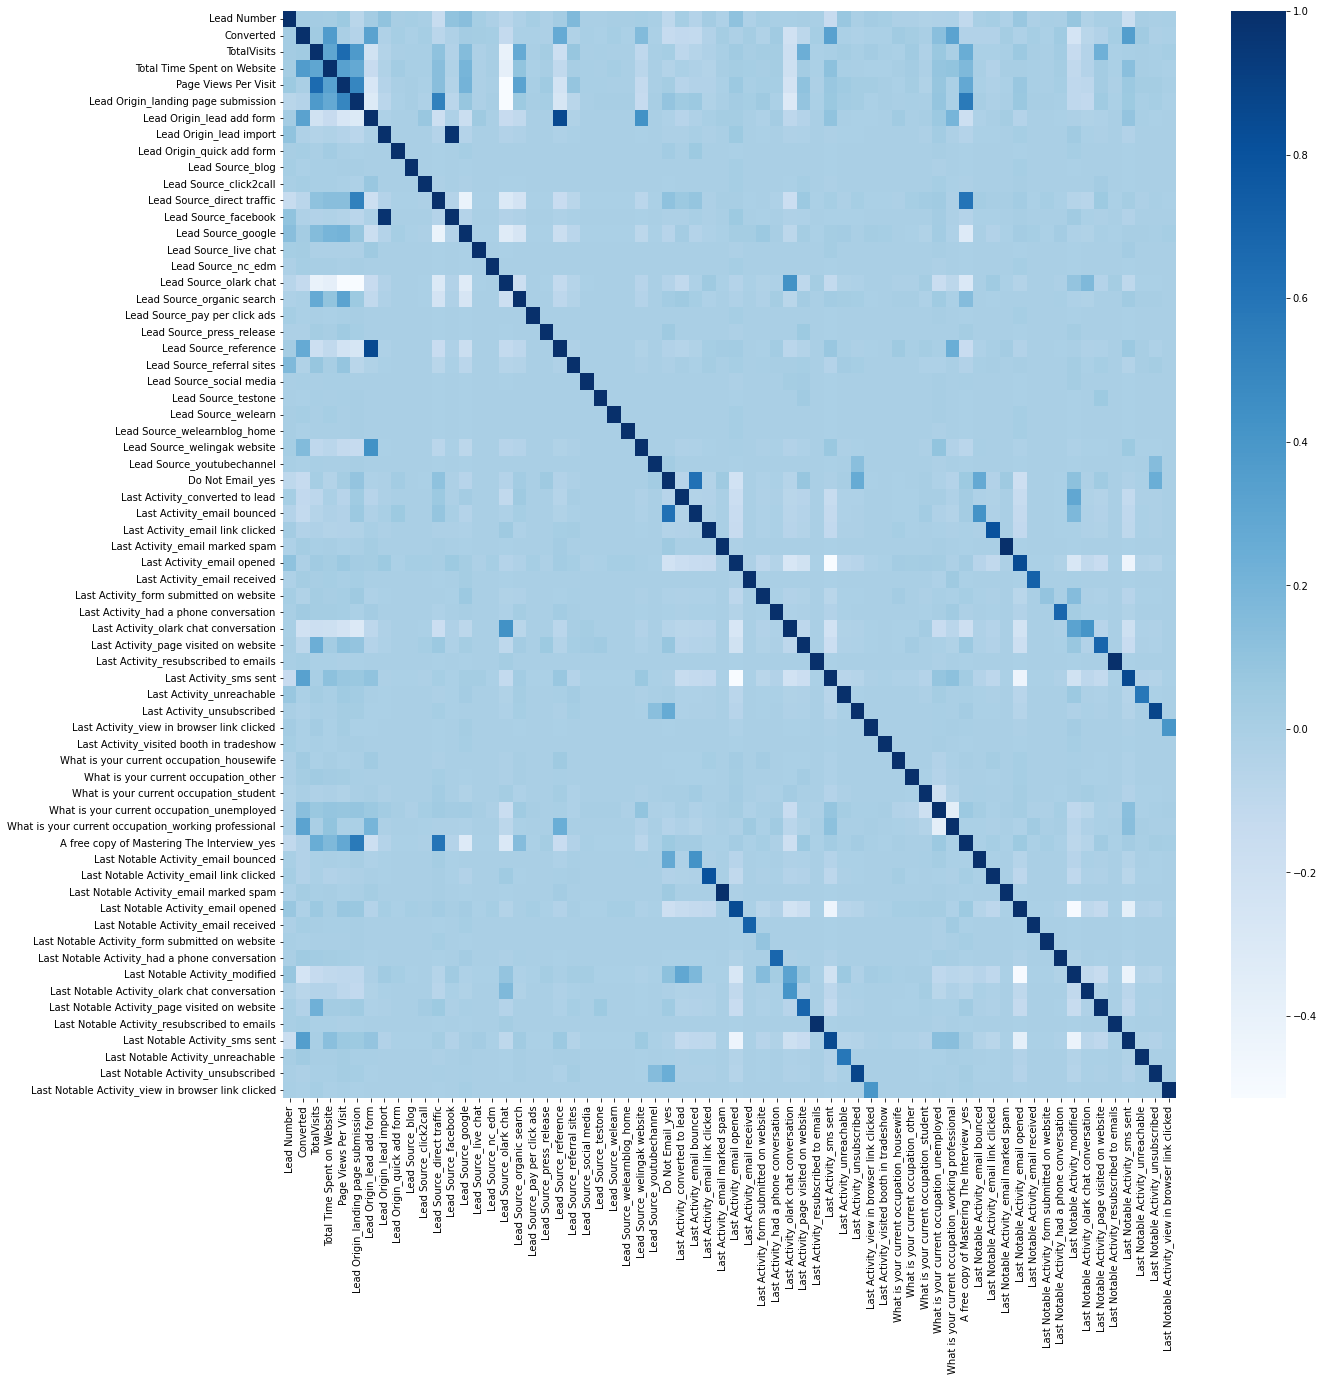

In [824]:
plt.figure(figsize = (20,20))
sns.heatmap(leeds.corr(), cmap='Blues')

# Test-Train Split

In [825]:
# importing the library
from sklearn.model_selection import train_test_split

In [826]:
# spiltting the data set
leeds_train,leeds_test = train_test_split(leeds, train_size = 0.7, test_size = 0.3, random_state = 100)

In [827]:
# Scalling of numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [828]:
leeds_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(leeds_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
leeds_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
8412,585646,1,-0.937999,-0.895783,-1.129528,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3291,628478,1,-0.937999,-0.895783,-1.129528,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8068,588064,1,-0.937999,-0.895783,-1.129528,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
987,649586,0,-0.658287,0.587007,-0.649305,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7421,592608,1,6.614236,-0.510076,0.047018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [829]:
# Describing the scalled features
leeds_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
count,6465.000000,6465.000000,6.465000e+03,6.465000e+03,6.465000e+03,6465.000000,6465.000000,6465.000000,6465.0,6465.000000,...,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.0,6465.000000,6465.000000,6465.000000,6465.000000
mean,617162.000309,0.385151,2.857558e-17,3.077370e-17,-7.088941e-17,0.525290,0.081671,0.005104,0.0,0.000155,...,0.000155,0.001547,0.365507,0.019026,0.033411,0.0,0.238051,0.003712,0.004331,0.000155
std,23343.934983,0.486669,1.000077e+00,1.000077e+00,1.000077e+00,0.499399,0.273883,0.071268,0.0,0.012437,...,0.012437,0.039302,0.481609,0.136625,0.179720,0.0,0.425923,0.060820,0.065673,0.012437
min,579533.000000,0.000000,-9.379993e-01,-8.957830e-01,-1.129528e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,596601.000000,0.000000,-6.582868e-01,-8.703117e-01,-6.493050e-01,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,615466.000000,0.000000,-9.886201e-02,-4.391199e-01,-1.690822e-01,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,637345.000000,1.000000,4.605628e-01,8.308036e-01,3.111405e-01,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,660728.000000,1.000000,1.976072e+01,3.237836e+00,1.039582e+01,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [830]:
y_train=leeds_train.pop('Converted')
X_train=leeds_train

In [831]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [832]:
# Import RFE
from sklearn.feature_selection import RFE


In [833]:
# Running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [834]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 17),
 ('Lead Origin_quick add form', False, 42),
 ('Lead Source_blog', False, 41),
 ('Lead Source_click2call', False, 26),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 16),
 ('Lead Source_google', False, 6),
 ('Lead Source_live chat', False, 24),
 ('Lead Source_nc_edm', False, 31),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 10),
 ('Lead Source_pay per click ads', False, 39),
 ('Lead Source_press_release', False, 34),
 ('Lead Source_reference', True, 1),
 ('Lead Source_referral sites', False, 12),
 ('Lead Source_social media', False, 28),
 ('Lead Source_testone', False, 35),
 ('Lead Source_welearn', False, 29),
 ('Lead Source_welearnblog_home', False, 38),
 ('Lead So

In [835]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [836]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [837]:
# Importing statsmodels
import statsmodels.api as sm

In [838]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.9
Date:                Sat, 21 Jan 2023   Deviance:                       5231.8
Time:                        15:14:58   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9555      0.993     -7.006      0.000      -8.901      -5.010
Lead Number                                            8.58e-06   1.57e-06      5.464      0.000     5.5e-06    1.17e-05
TotalVisits                                              0.1170      0.039      2.990      0.003       0.040       0.194
Total Time Spent on Website                              1.0926      0.040     27.276      0.000       1.014       1.171
Lead Origin_landing page submission                     -0.2975      0.101     -2.937      0.003      -0.496      -0.099
Lead Origin_lead add form                                2.5252      0.511      4.941      0.000       1.524       3.527
Lead Source_direct traffic                              -0.2284      0.103     -2.221      0.026      -0.430      -0.027
Lead Source_olark chat                                   1.0990      0.128      8.594      0.000       0.848       1.350
Lead Source_reference                                    0.7419      0.534      1.388      0.165      -0.306       1.789
Lead Source_welingak website                             3.3859      1.128      3.002      0.003       1.176       5.596
Do Not Email_yes                                        -0.9779      0.190     -5.143      0.000      -1.351      -0.605
Last Activity_converted to lead                         -0.8272      0.229     -3.618      0.000      -1.275      -0.379
Last Activity_email bounced                             -0.9849      0.371     -2.652      0.008      -1.713      -0.257
Last Activity_olark chat conversation                   -1.1069      0.174     -6.371      0.000      -1.447      -0.766
Last Activity_page visited on website                   -0.4100      0.156     -2.622      0.009      -0.717      -0.103
Last Activity_sms sent                                   0.6755      0.166      4.057      0.000       0.349       1.002
What is your current occupation_unemployed               0.9446      0.083     11.449      0.000       0.783       1.106
What is your current occupation_working professional     3.3858      0.192     17.678      0.000       3.010       3.761
A free copy of Mastering The Interview_yes               0.0191      0.100      0.191      0.849      -0.177       0.215
Last Notable Activity_modified                          -0.4682      0.106     -4.414      0.000      -0.676      -0.260
Last Notable Activity_sms sent                           0.6774      0.184      3.678      0.000       0.316       1.038
========================================================================================================================
"""

In [839]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [840]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_lead add form,18.85
7,Lead Source_reference,14.91
0,Lead Number,8.76
14,Last Activity_sms sent,7.08
19,Last Notable Activity_sms sent,6.99
3,Lead Origin_landing page submission,4.82
8,Lead Source_welingak website,4.43
15,What is your current occupation_unemployed,3.24
18,Last Notable Activity_modified,3.13
17,A free copy of Mastering The Interview_yes,2.69


In [841]:
X_train_new=X_train.drop('Lead Origin_lead add form', axis = 1,)

**Dropping the lead number due to its high VIF**

In [842]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.5
Date:                Sat, 21 Jan 2023   Deviance:                       5263.1
Time:                        15:14:58   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9030      0.989     -6.981      0.000      -8.841      -4.965
Lead Number                                           8.584e-06   1.56e-06      5.488      0.000    5.52e-06    1.16e-05
TotalVisits                                              0.0989      0.039      2.549      0.011       0.023       0.175
Total Time Spent on Website                              1.0766      0.040     27.089      0.000       0.999       1.154
Lead Origin_landing page submission                     -0.3618      0.100     -3.608      0.000      -0.558      -0.165
Lead Source_direct traffic                              -0.2403      0.102     -2.345      0.019      -0.441      -0.039
Lead Source_olark chat                                   1.0018      0.126      7.975      0.000       0.756       1.248
Lead Source_reference                                    3.1570      0.204     15.443      0.000       2.756       3.558
Lead Source_welingak website                             5.7866      1.015      5.703      0.000       3.798       7.775
Do Not Email_yes                                        -0.9112      0.187     -4.864      0.000      -1.278      -0.544
Last Activity_converted to lead                         -0.8570      0.228     -3.763      0.000      -1.303      -0.411
Last Activity_email bounced                             -0.9295      0.363     -2.562      0.010      -1.641      -0.218
Last Activity_olark chat conversation                   -1.1243      0.173     -6.486      0.000      -1.464      -0.784
Last Activity_page visited on website                   -0.3988      0.155     -2.570      0.010      -0.703      -0.095
Last Activity_sms sent                                   0.6789      0.166      4.091      0.000       0.354       1.004
What is your current occupation_unemployed               0.9654      0.082     11.739      0.000       0.804       1.127
What is your current occupation_working professional     3.4007      0.191     17.790      0.000       3.026       3.775
A free copy of Mastering The Interview_yes               0.0234      0.100      0.234      0.815      -0.172       0.219
Last Notable Activity_modified                          -0.4618      0.106     -4.375      0.000      -0.669      -0.255
Last Notable Activity_sms sent                           0.6909      0.184      3.765      0.000       0.331       1.051
========================================================================================================================
"""

In [843]:
vif = pd.DataFrame()
X_train=X_train_new
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,8.72
13,Last Activity_sms sent,7.08
18,Last Notable Activity_sms sent,6.99
3,Lead Origin_landing page submission,4.78
14,What is your current occupation_unemployed,3.24
17,Last Notable Activity_modified,3.13
16,A free copy of Mastering The Interview_yes,2.69
5,Lead Source_olark chat,2.51
4,Lead Source_direct traffic,2.46
10,Last Activity_email bounced,1.97


In [844]:
X_train1=X_train_new.drop('Lead Number', axis = 1)

**Dropping the Last Notable Activity_sms sent due to its high VIF**

In [845]:
X_train_sm = sm.add_constant(X_train1)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.7
Date:                Sat, 21 Jan 2023   Deviance:                       5293.4
Time:                        15:14:59   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5186      0.105    -14.523      0.000      -1.724      -1.314
TotalVisits                                              0.0982      0.039      2.526      0.012       0.022       0.174
Total Time Spent on Website                              1.0757      0.040     27.106      0.000       0.998       1.154
Lead Origin_landing page submission                     -0.3898      0.100     -3.891      0.000      -0.586      -0.193
Lead Source_direct traffic                              -0.2990      0.102     -2.936      0.003      -0.499      -0.099
Lead Source_olark chat                                   0.9174      0.124      7.390      0.000       0.674       1.161
Lead Source_reference                                    3.1176      0.203     15.338      0.000       2.719       3.516
Lead Source_welingak website                             5.7636      1.015      5.676      0.000       3.773       7.754
Do Not Email_yes                                        -0.9694      0.187     -5.189      0.000      -1.336      -0.603
Last Activity_converted to lead                         -0.8707      0.226     -3.861      0.000      -1.313      -0.429
Last Activity_email bounced                             -0.9181      0.363     -2.528      0.011      -1.630      -0.206
Last Activity_olark chat conversation                   -1.1567      0.173     -6.697      0.000      -1.495      -0.818
Last Activity_page visited on website                   -0.4021      0.154     -2.604      0.009      -0.705      -0.099
Last Activity_sms sent                                   0.6533      0.165      3.949      0.000       0.329       0.978
What is your current occupation_unemployed               0.9554      0.082     11.623      0.000       0.794       1.117
What is your current occupation_working professional     3.3676      0.190     17.715      0.000       2.995       3.740
A free copy of Mastering The Interview_yes               0.0147      0.100      0.148      0.882      -0.180       0.210
Last Notable Activity_modified                          -0.4306      0.105     -4.082      0.000      -0.637      -0.224
Last Notable Activity_sms sent                           0.6177      0.182      3.386      0.001       0.260       0.975
========================================================================================================================
"""

In [846]:
vif = pd.DataFrame()
X_train=X_train1
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Activity_sms sent,7.04
17,Last Notable Activity_sms sent,6.97
2,Lead Origin_landing page submission,3.64
16,Last Notable Activity_modified,2.93
15,A free copy of Mastering The Interview_yes,2.69
3,Lead Source_direct traffic,2.46
13,What is your current occupation_unemployed,2.43
9,Last Activity_email bounced,1.97
7,Do Not Email_yes,1.91
4,Lead Source_olark chat,1.91


In [847]:
X_train2=X_train1.drop('Last Activity_sms sent', axis = 1)

**Dropping Lead Source_reference because of high p value**

In [848]:
X_train_sm = sm.add_constant(X_train2)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.4
Date:                Sat, 21 Jan 2023   Deviance:                       5308.9
Time:                        15:14:59   Pearson chi2:                 6.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4905      0.104    -14.337      0.000      -1.694      -1.287
TotalVisits                                              0.1024      0.039      2.634      0.008       0.026       0.179
Total Time Spent on Website                              1.0762      0.040     27.134      0.000       0.998       1.154
Lead Origin_landing page submission                     -0.3879      0.100     -3.878      0.000      -0.584      -0.192
Lead Source_direct traffic                              -0.2982      0.102     -2.932      0.003      -0.498      -0.099
Lead Source_olark chat                                   0.9110      0.124      7.362      0.000       0.668       1.153
Lead Source_reference                                    3.1203      0.203     15.369      0.000       2.722       3.518
Lead Source_welingak website                             5.8504      1.016      5.758      0.000       3.859       7.842
Do Not Email_yes                                        -0.9230      0.186     -4.949      0.000      -1.289      -0.558
Last Activity_converted to lead                         -1.0841      0.218     -4.965      0.000      -1.512      -0.656
Last Activity_email bounced                             -1.1073      0.360     -3.079      0.002      -1.812      -0.402
Last Activity_olark chat conversation                   -1.3214      0.167     -7.905      0.000      -1.649      -0.994
Last Activity_page visited on website                   -0.5184      0.151     -3.429      0.001      -0.815      -0.222
What is your current occupation_unemployed               0.9323      0.082     11.396      0.000       0.772       1.093
What is your current occupation_working professional     3.3462      0.190     17.636      0.000       2.974       3.718
A free copy of Mastering The Interview_yes               0.0194      0.099      0.195      0.846      -0.176       0.214
Last Notable Activity_modified                          -0.2289      0.091     -2.515      0.012      -0.407      -0.050
Last Notable Activity_sms sent                           1.2563      0.085     14.732      0.000       1.089       1.423
========================================================================================================================
"""

In [849]:
vif = pd.DataFrame()
X_train=X_train2
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.63
14,A free copy of Mastering The Interview_yes,2.69
3,Lead Source_direct traffic,2.46
12,What is your current occupation_unemployed,2.43
15,Last Notable Activity_modified,2.24
4,Lead Source_olark chat,1.91
7,Do Not Email_yes,1.90
9,Last Activity_email bounced,1.88
10,Last Activity_olark chat conversation,1.62
16,Last Notable Activity_sms sent,1.61


In [850]:
X_train3=X_train2.drop('A free copy of Mastering The Interview_yes', axis = 1)

In [851]:
X_train_sm = sm.add_constant(X_train3)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.4
Date:                Sat, 21 Jan 2023   Deviance:                       5308.9
Time:                        15:14:59   Pearson chi2:                 6.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4904      0.104    -14.336      0.000      -1.694      -1.287
TotalVisits                                              0.1033      0.039      2.676      0.007       0.028       0.179
Total Time Spent on Website                              1.0761      0.040     27.134      0.000       0.998       1.154
Lead Origin_landing page submission                     -0.3822      0.096     -3.998      0.000      -0.570      -0.195
Lead Source_direct traffic                              -0.2890      0.090     -3.208      0.001      -0.466      -0.112
Lead Source_olark chat                                   0.9124      0.124      7.386      0.000       0.670       1.154
Lead Source_reference                                    3.1212      0.203     15.377      0.000       2.723       3.519
Lead Source_welingak website                             5.8510      1.016      5.759      0.000       3.860       7.842
Do Not Email_yes                                        -0.9241      0.186     -4.956      0.000      -1.290      -0.559
Last Activity_converted to lead                         -1.0837      0.218     -4.964      0.000      -1.512      -0.656
Last Activity_email bounced                             -1.1075      0.360     -3.078      0.002      -1.813      -0.402
Last Activity_olark chat conversation                   -1.3217      0.167     -7.909      0.000      -1.649      -0.994
Last Activity_page visited on website                   -0.5187      0.151     -3.431      0.001      -0.815      -0.222
What is your current occupation_unemployed               0.9326      0.082     11.402      0.000       0.772       1.093
What is your current occupation_working professional     3.3457      0.190     17.638      0.000       2.974       3.717
Last Notable Activity_modified                          -0.2291      0.091     -2.517      0.012      -0.407      -0.051
Last Notable Activity_sms sent                           1.2562      0.085     14.731      0.000       1.089       1.423
========================================================================================================================
"""

In [852]:
vif = pd.DataFrame()
X_train=X_train3
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.18
12,What is your current occupation_unemployed,2.43
14,Last Notable Activity_modified,2.24
3,Lead Source_direct traffic,1.96
4,Lead Source_olark chat,1.90
7,Do Not Email_yes,1.90
9,Last Activity_email bounced,1.88
10,Last Activity_olark chat conversation,1.62
15,Last Notable Activity_sms sent,1.61
0,TotalVisits,1.46


In [853]:
# Predicting the probabilities on the train set
y_train_pred = logm5.fit().predict(X_train_sm)
y_train_pred[:20]

8412    0.982073
3291    0.862326
8068    0.817955
987     0.096265
7421    0.073267
1032    0.862449
8684    0.624719
4318    0.437425
7296    0.370199
712     0.068698
3954    0.039110
3936    0.320591
5166    0.049237
4689    0.086415
5905    0.390269
3671    0.904897
1050    0.547143
8706    0.048946
3172    0.993664
6567    0.781340
dtype: float64

In [854]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.98207268, 0.8623259 , 0.81795526, 0.09626513, 0.07326674,
       0.86244931, 0.62471948, 0.43742533, 0.37019854, 0.06869813,
       0.03911046, 0.32059107, 0.04923718, 0.08641503, 0.39026913,
       0.90489724, 0.54714324, 0.04894634, 0.9936636 , 0.78134001])

In [855]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.982073
1,1,0.862326
2,1,0.817955
3,0,0.096265
4,1,0.073267


In [856]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.982073,1
1,1,0.862326,1
2,1,0.817955,1
3,0,0.096265,0
4,1,0.073267,0


In [857]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [858]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3530,  445],
       [ 732, 1758]])

In [859]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8179427687548337

In [860]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [861]:
# Calculating True possitive rate
TP/(TP+FN)

0.7060240963855422

In [862]:
# Calculating the false positive rate
1-TN/(TN+FP)

0.11194968553459117

# ROC Curve

In [863]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [864]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


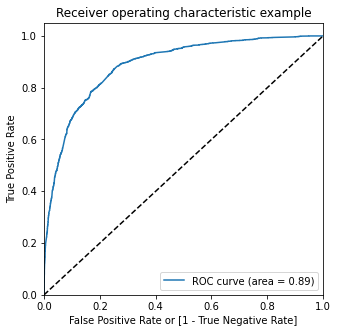

In [865]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [866]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.982073,1,1,1,1,1,1,1,1,1,1,1
1,1,0.862326,1,1,1,1,1,1,1,1,1,1,0
2,1,0.817955,1,1,1,1,1,1,1,1,1,1,0
3,0,0.096265,0,1,0,0,0,0,0,0,0,0,0
4,1,0.073267,0,1,0,0,0,0,0,0,0,0,0


In [867]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385151,1.000000,0.000000
0.1,0.1,0.620418,0.972691,0.399748
0.2,0.2,0.759783,0.914859,0.662642
0.3,0.3,0.797061,0.864659,0.754717
0.4,0.4,0.813921,0.784739,0.832201
0.5,0.5,0.817943,0.706024,0.888050
0.6,0.6,0.806651,0.628112,0.918491
0.7,0.7,0.781593,0.517269,0.947170
0.8,0.8,0.755452,0.417671,0.967044
0.9,0.9,0.711833,0.273896,0.986164


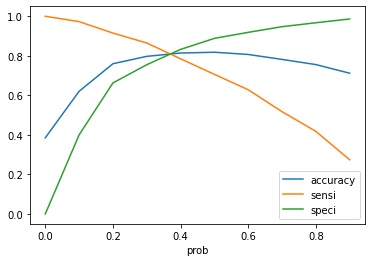

In [868]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [869]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.982073,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.862326,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.817955,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.096265,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.073267,0,1,0,0,0,0,0,0,0,0,0,0


In [870]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8085073472544471

In [871]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3239,  736],
       [ 502, 1988]])

In [872]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [873]:
# Calculating the true positive rate
TP/(TP+FN)

0.7983935742971887

In [874]:
# Calculating the False positive rate
1-TN/(TN+FP)

0.18515723270440254

# For Test Set

In [875]:
y_test=leeds_test.pop('Converted')
X_test=leeds_test


In [876]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [877]:
# Substituting all the columns in the final train model
col = X_train3.columns

In [878]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [879]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm5.fit().predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067886
1,0,0.058999
2,0,0.224654
3,1,0.133779
4,0,0.183554


In [880]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.067886,0
1,0,0.058999,0
2,0,0.224654,0
3,1,0.133779,0
4,0,0.183554,0
...,...,...,...
2766,0,0.330425,0
2767,0,0.111167,0
2768,0,0.062475,0
2769,1,0.746449,1


In [881]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8163118007939372

In [882]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  291],
       [ 218,  852]])

In [883]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [884]:
# Calculating True positive rate
TP/(TP+FN)

0.7962616822429907

In [885]:
# Calculating the False postive rate
1-TN/(TN+FP)

0.17107583774250446

In [886]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3530,  445],
       [ 732, 1758]])

In [887]:
# Precision 
TP / (TP + FP)

0.7454068241469817

In [888]:
#Recall 
TP /(TP + FN)

0.7962616822429907

# Precision-Recall

In [889]:
from sklearn.metrics import precision_recall_curve

In [890]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

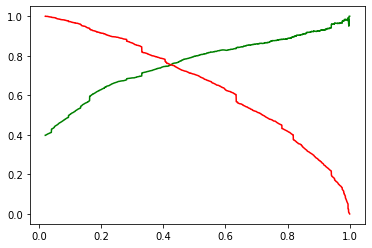

In [891]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [892]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.982073,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.862326,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.817955,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.096265,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.073267,0,1,0,0,0,0,0,0,0,0,0,0


In [893]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8100541376643465

In [894]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3329,  646],
       [ 582, 1908]])

In [895]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [896]:
# Precision = TP / TP + FP
TP / (TP + FP)


0.7470634299138607

In [897]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7662650602409639

# Precision-Recall for Test Data

In [898]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = logm5.fit().predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067886
1,0,0.058999
2,0,0.224654
3,1,0.133779
4,0,0.183554


In [899]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.067886,0
1,0,0.058999,0
2,0,0.224654,0
3,1,0.133779,0
4,0,0.183554,0
...,...,...,...
2766,0,0.330425,0
2767,0,0.111167,0
2768,0,0.062475,0
2769,1,0.746449,1


In [900]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8195597257307831

In [901]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1464,  237],
       [ 263,  807]])

In [902]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [903]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7729885057471264

In [904]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7542056074766356